Quanutm arithmetic

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from qiskit.visualization import plot_histogram
from qiskit import *

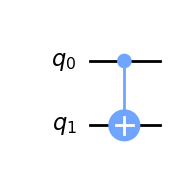

In [4]:
from qiskit import QuantumCircuit, Aer, QuantumRegister, ClassicalRegister
import numpy as np
qc = QuantumCircuit(2)
qc.cx(0, 1)
qc.draw("mpl")

Quantum addition

In [2]:
# Classical addition
a = 1  
b = 2
print(a + b)

3


In [3]:
print("{0:{fill}3b}".format(1, fill="0"))
print("{0:{fill}3b}".format(2, fill="0"))


001
010


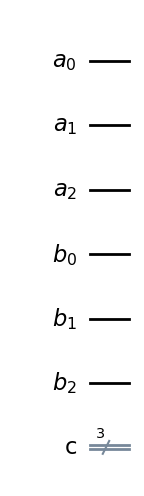

In [5]:
r_a = QuantumRegister(3, 'a')
r_b = QuantumRegister(3, 'b')
c_r = ClassicalRegister(3, 'c')
qc = QuantumCircuit(r_a, r_b, c_r)

qc.draw("mpl")

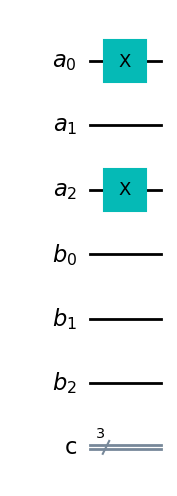

In [6]:
# Encode number 5
qc.x(r_a[0])
qc.x(r_a[2])

qc.draw("mpl")


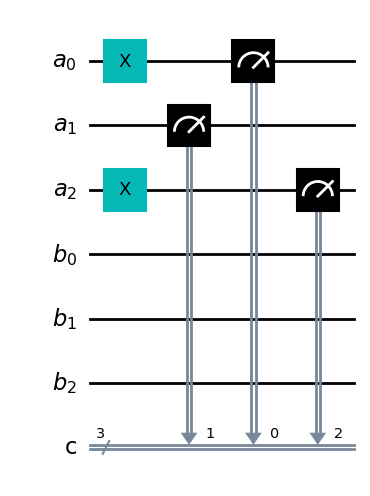

In [7]:
# measure r_a
qc.measure(r_a, c_r)
qc.draw("mpl")

In [12]:
import qiskit
from qiskit import execute

In [13]:
# run measurment
backend = Aer.get_backend("qasm_simulator")
job = qiskit.execute(qc, backend, shots = 50)

result = job.result()
counts = result.get_counts(qc)
print(counts)

{'101': 50}


In [ ]:
from qiskit import IBMQ
provider = IBMQ.load_acount()

Funciton to encode any number to a quantum circuit

In [14]:

def set_quantum_state(a, b):
    
    get_binary = lambda x : "{0:{fill}3b}".format(x, fill="0")

    r_a = QuantumRegister(3, 'a')
    r_b = QuantumRegister(3, 'b')
    c_r = ClassicalRegister(3, 'c')
    qc = QuantumCircuit(r_a, r_b, c_r)

    a_binary = get_binary(a)
    b_binary = get_binary(b)

    for i in range(3):
        if a_binary[i] == "1":
            qc.x(r_a[2-i])
        if b_binary[i] == "1":
            qc.x(r_b[2-i])
    
    return qc, r_a, r_b, c_r


In [12]:
def controlled_rotations(qc, reg_a, reg_b, n):
    for i in range(0, n+1):
        qc.cul(np.pi/2**i, reg_b[n-i], reg_a[n])

In [ ]:
qc, r_a, r_b, c_r = set_quantum_state(1,3)

qc.append(QFT(3, do_swaps=False), [2,1,0])

for i in range(0, 3):
    controlled_rotations(qc, r_a, r_b, 2-i)

qc.append(QFT(3, do_swaps=False).inverse(), [2,1,0])

qc.measure(r_a, c_r)
qc.draw("mpl")

In [30]:
# run measurment -- simulator
backend = Aer.get_backend("qasm_simulator")
job = qiskit.execute(qc, backend, shots = 50)

result = job.result()
counts = result.get_counts(qc)
print(counts)

{'011': 50}


In [16]:
import os
print(os.environ.get("IBM_API_KEY"))

f0034ceb14770a974823391203ab52aa329101a6e78ddd945ee71ce9c9057a13fd907df851fa9a8bd2352629e7a52f78b444bce2b5ef8658e9e9dfd1c12a23d0


In [17]:
# Add IBM account
import os
from qiskit import IBMQ
# print(os.environ.get("IBM_API_KEY"))
IBMQ.save_account(os.environ.get("IBM_API_KEY"), overwrite=True)
IBMQ.load_account()

/tmp/ipykernel_25720/793011244.py:5: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.save_account(os.environ.get("IBM_API_KEY"), overwrite=True)
/tmp/ipykernel_25720/793011244.py:5: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account(os.environ.get("IBM_API_KEY"), overwrite=True)


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [21]:
# run measurment -- real
provider = IBMQ.get_provider('ibm-q')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_perth') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_brisbane') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [23]:
from qiskit.tools.monitor import job_monitor
from qiskit import transpile
from qiskit.visualization import plot_histogram

In [ ]:
# backend = provider.get_backend('simulator_stabilizer')
backend = provider.get_backend('ibm_nairobi')

mycircuit_trans = transpile(qc, backend)
job = backend.run(mycircuit_trans, shots=1024)
print(job.job_id())
job_monitor(job)
    
output = job.result().get_counts()

{'101': 8192}


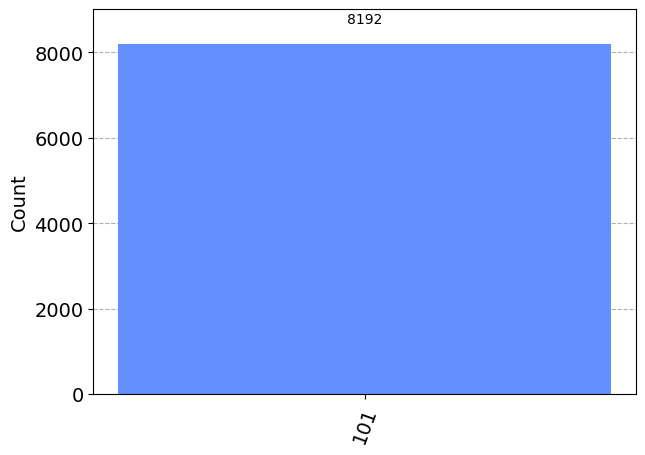

In [35]:
print(output)
plot_histogram(output)

In [ ]:
backend = provider.get_backend('ibm_brisbane')

mycircuit_trans = transpile(qc, backend)
job = backend.run(mycircuit_trans, shots=1024)
print(job.job_id())
job_monitor(job)
    
output = job.result().get_counts()

{'101': 8192}


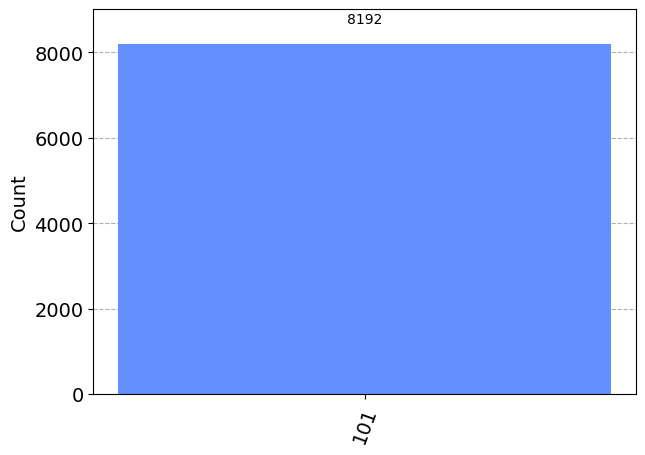

In [33]:
print(output)
plot_histogram(output)

In [ ]:
backend = provider.get_provider("ibmq_16_melbourne")
job = qiskit.execute(qc, backend, shots = 50)

result = job.result()
counts = result.get_counts(qc)
print(counts)
qiskit.visualization.plot_histogram(counts)